# Fourier Transform of Orbits of Mass-Spring-Damper Systems

In [1]:
# import numpy for elementary functions and constants 
import numpy as np 
# import fftpack for numerically computing the Fourier transform 
from scipy.fftpack import fft, fftfreq, fftshift, ifft
# import matplotlib for plotting 
import matplotlib.pyplot as plt

## Section 1: Mass-Spring System (no Damper) - Symbolically - Reference Solution
The Fourier Transform of sinus function is same sinus function.

In [2]:
from sympy import fourier_series, pi, sin, exp 
from sympy.abc import t
s = fourier_series((sin(10*2*pi*t)), (t, 0, 1))
t=s.scale(1).truncate()
print(t)

sin(20*pi*t)


A similar answer can be found be considering the Fourier Transform (the continuous counterpart of the Fourier series). The Fourier series of $u(t) \, \sin(\omega_0 \, t)$ ($u(t)$ is the Heaviside functiion in $t=0$) is given by $\frac{\pi}{j}[ \delta(\omega - \omega_0) + \delta(\omega - \omega_0) ] + \frac{\omega_0}{(\omega - \omega_0)^2}$. The real part of the expression has a pole in $\omega = \omega_0$.

## Section 2: Mass-Spring System (no Damper) - Numerically
We compute numerically the Fourier transform of an undamped harmonic oscillator. The result in frequency domain shows a single frequency. 

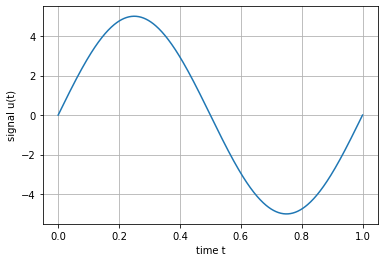

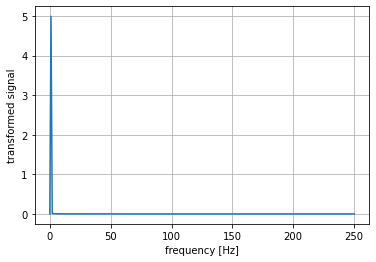

In [5]:
# set final time 
tfinal = 1.0
# set number of samples on [0,Tfinal], including the boundary samples 
Nsamples = 500
# set spacing in time 
dt = tfinal/Nsamples
# set axis in time
tt = np.linspace(0.0, tfinal, Nsamples)

# define and plot the signal 
u = 5*np.sin(1* 2.0*np.pi*tt) 
# plot the signal
fig,ax = plt.subplots()
ax.plot(tt,u)
ax.set_xlabel("time t")
ax.set_ylabel("signal u(t)")
plt.grid() 
plt.show()

# perform FFT 
uf = fft(u)
xf = np.linspace(0.0, 1.0/(2.0*dt), Nsamples//2)
# plot the frequency content 
plt.plot(xf, 2.0/Nsamples * np.abs(uf[0:Nsamples//2]))
plt.xlabel("frequency [Hz]")
plt.ylabel("transformed signal")
plt.grid()
plt.show()

## Section 3: Mass-Spring-Damper System - Symbolically - Reference Solution

For system without damping, the result in frequency domain is given in [top row of Figure 7](https://community.sw.siemens.com/s/article/what-is-the-fourier-transform). For system with damping, the result is given in [second row of Figure 7](https://community.sw.siemens.com/s/article/what-is-the-fourier-transform). Damping introduces a range of frequencies close to the resonant frequency. This ressembles the measured acceleration to some extend. To gain a better understanding of how the damping affects the frequency contents of the signal, the Fourier transform of the damped signal can be computed. See e.g. [table of Fourier transforms](https://uspas.fnal.gov/materials/11ODU/FourierTransformPairs.pdf). 

A similar answer can be found be considering the Fourier Transform (the continuous counterpart of the Fourier series). The Fourier series of $u(t) \, \exp(-\alpha t) \, \sin(\omega_0 \, t)$ ($u(t)$ is the Heaviside functiion in $t=0$) is given by $\frac{\omega_0}{\omega_0^2 + (\alpha + j \, \omega)^2}$. Non-zero values of $\alpha$ cause the pole to disappear. Large values of $\alpha$ cause lower peak values. 

## Section 4: Mass-Spring-Damper System- Numerically
We compute numerically the Fourier transform of a damped oscillator. Damping is seen to introduce multiple frequencies close to the resonant frequency. 

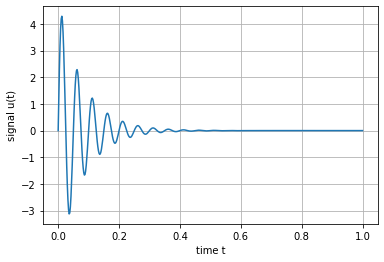

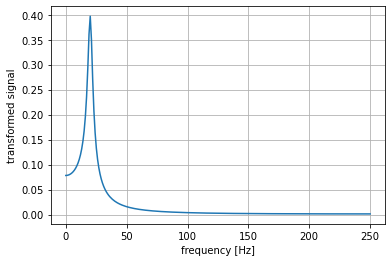

In [11]:
# set final time 
tfinal = 1.0
# set number of samples on [0,Tfinal], including the boundary samples 
Nsamples = 500
# set spacing in time 
dt = tfinal/Nsamples
# set axis in time
t = np.linspace(0.0, tfinal, Nsamples)

# define and plot the signal 
u = 5*np.sin(20 * 2.0*np.pi*t)*np.exp(-4*np.pi*t) 
# plot the signal
fig,ax = plt.subplots()
ax.plot(t,u)
ax.set_xlabel("time t")
ax.set_ylabel("signal u(t)")
plt.grid() 
plt.show()

# perform FFT 
uf = fft(u)
xf = np.linspace(0.0, 1.0/(2.0*dt), Nsamples//2)
# plot the frequency content 
plt.plot(xf, 2.0/Nsamples * np.abs(uf[0:Nsamples//2]))
plt.xlabel("frequency [Hz]")
plt.ylabel("transformed signal")
plt.grid()
plt.show()